In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, StratifiedKFold, cross_validate
from sklearn.metrics import precision_recall_fscore_support, make_scorer, recall_score, f1_score, confusion_matrix, precision_score, balanced_accuracy_score
from sklearn.metrics import fbeta_score, classification_report


from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from libs.print_cm import print_cm
from libs.loader import load_jobchange

         

from sklearn.model_selection import learning_curve, validation_curve

In [5]:
#Using Dataset for Data Scientist Job Change binary classification: 
# https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists?select=aug_train.csv
# df = pd.read_csv("data/job_change_data_scientist.csv")
# df_enc_0 = df.apply(LabelEncoder().fit_transform)
# df_enc = df_enc_0.drop(columns=["enrollee_id","target"])
# minMaxNorm = MinMaxScaler()
# df_norm = minMaxNorm.fit_transform(df_enc)

# # X = df_norm
# # y = df_enc_0["target"]

# _y = df['target']
# y = _y.values.astype('int32')
# X = df_enc_0

X, y = load_jobchange()



In [8]:
# svc = SVC()
svc = SVC(kernel='linear',C=10.0, class_weight='balanced', max_iter=100000, random_state=0)

# scorer = make_scorer(precision_score, pos_label=1 )
# scorer = make_scorer(recall_score, pos_label=0)
# scorer = make_scorer(recall_score,average='weighted')
# scorer = make_scorer(f1_score, average='weighted' )
scorer = make_scorer(f1_score)


cv_target = cross_validate(svc, X, y, cv=3, scoring=scorer)
cv_target

/Users/sdodge/work/omscs/cs7641/cs7641_assignments/env3.9.7/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/sdodge/work/omscs/cs7641/cs7641_assignments/env3.9.7/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/sdodge/work/omscs/cs7641/cs7641_assignments/env3.9.7/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


{'fit_time': array([4.18782115, 4.08377504, 4.08063889]),
 'score_time': array([0.266505  , 0.23819089, 0.24869609]),
 'test_score': array([0.36226794, 0.3126988 , 0.47567568])}

In [9]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, stratify=y,random_state=0)
svc.fit(X_train,y_train)
pass

/Users/sdodge/work/omscs/cs7641/cs7641_assignments/env3.9.7/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


In [11]:
def stats_pac( label, estimator, X_data, y_data ):
    predicted = estimator.predict(X_data)
    print ('****** %s ******' % label)
    cm = confusion_matrix(y_data, predicted)
    print ('Confusion matrix')
    print_cm(cm, labels=['0','1'])
    
    print ('Recall - label 0: %0.4f'% recall_score(y_data, predicted, pos_label=0))
    print ('Recall - label 1: %0.4f'% recall_score(y_data, predicted))

    print ('Precsion - label 0: %0.4f'% precision_score(y_data, predicted, pos_label=0))
    print ('Precsion - label 1: %0.4f'% precision_score(y_data, predicted))
    
    sample_wt = [ 3 if i == 1 else 1 for i in predicted]
    print ('F1 Score macro: %0.4f'% f1_score(y_data, predicted, average='macro', sample_weight=sample_wt ))
    print ('F1 Score - label 0 : %0.4f'% f1_score(y_data, predicted, pos_label=0 ))
    print ('F1 Score - label 1 : %0.4f'% f1_score(y_data, predicted, pos_label=1 ))
    print ('F1 Score - weighted avg : %0.4f'% f1_score(y_data, predicted, average='weighted' ))
    print ('F1 Beta - b=2 weighted avg : %0.4f'% fbeta_score(y_data,predicted, average='weighted', beta=2))
    
    print (classification_report(y_data, predicted, labels=[1,0]))


stats_pac('SVM plain - Train', svc, X_train, y_train)
stats_pac('SVM plain - Validation', svc, X_test, y_test)

****** SVM plain - Train ******
Confusion matrix
              0     1 
        0  4130  4498 
        1  1184  1682 
Recall - label 0: 0.4787
Recall - label 1: 0.5869
Precsion - label 0: 0.7772
Precsion - label 1: 0.2722
F1 Score macro: 0.3838
F1 Score - label 0 : 0.5925
F1 Score - label 1 : 0.3719
F1 Score - weighted avg : 0.5375
F1 Beta - b=2 weighted avg : 0.5081
              precision    recall  f1-score   support

           1       0.27      0.59      0.37      2866
           0       0.78      0.48      0.59      8628

    accuracy                           0.51     11494
   macro avg       0.52      0.53      0.48     11494
weighted avg       0.65      0.51      0.54     11494

****** SVM plain - Validation ******
Confusion matrix
              0     1 
        0  1080  1077 
        1   279   438 
Recall - label 0: 0.5007
Recall - label 1: 0.6109
Precsion - label 0: 0.7947
Precsion - label 1: 0.2891
F1 Score macro: 0.4046
F1 Score - label 0 : 0.6143
F1 Score - label 1 : 0.39

## Hyper param tune

In [16]:
svc2 = SVC(kernel='linear',C=10.0, class_weight='balanced', max_iter=200000, random_state=0)
range_list = ['linear', 'rbf', 'sigmoid','poly']

In [17]:
strat_cv = StratifiedKFold(3, shuffle=True,  random_state=0)
svc_train_scores, svc_test_scores = validation_curve(
    svc2, X, y, param_name="kernel", param_range=range_list,
    scoring=scorer, cv=strat_cv, n_jobs=-1)

/Users/sdodge/work/omscs/cs7641/cs7641_assignments/env3.9.7/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=200000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/sdodge/work/omscs/cs7641/cs7641_assignments/env3.9.7/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=200000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/sdodge/work/omscs/cs7641/cs7641_assignments/env3.9.7/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=200000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/sdodge/work/omscs/cs7641/cs7641_assignments/env3.9.7/lib/python3.9/site-pac

In [18]:
train_scores_mean = np.mean(svc_train_scores, axis=1)
test_scores_mean = np.mean(svc_test_scores, axis=1)
# print (range_list.shape,train_scores_mean.shape,test_scores_mean.shape)
df_1 = pd.DataFrame({'x':range_list,'train':train_scores_mean,'test':test_scores_mean} )
df_1

,x,train,test
0,linear,0.380563,0.391862
1,rbf,0.576904,0.571851
2,sigmoid,0.314295,0.314815
3,poly,0.544454,0.542790


In [35]:
svc4 = SVC(kernel='rbf', class_weight='balanced', max_iter=100000, random_state=0)
range_list4  = np.logspace(-4, 3, 10)
range_list4


array([1.00000000e-04, 5.99484250e-04, 3.59381366e-03, 2.15443469e-02,
       1.29154967e-01, 7.74263683e-01, 4.64158883e+00, 2.78255940e+01,
       1.66810054e+02, 1.00000000e+03])

In [36]:
svc_train_scores4, svc_test_scores4 = validation_curve(
    svc4, X, y, param_name="gamma", param_range=range_list4,
    scoring=scorer, cv=strat_cv, n_jobs=-1)
print("done")

In [39]:
train_scores_mean4 = np.mean(svc_train_scores4, axis=1)
test_scores_mean4 = np.mean(svc_test_scores4, axis=1)
# print (range_list.shape,train_scores_mean.shape,test_scores_mean.shape)
df_4 = pd.DataFrame({'x':range_list4,'train':train_scores_mean4,'test':test_scores_mean4} )
df_4

,x,train,test
0,0.000100,0.537483,0.530359
1,0.000599,0.577203,0.561264
2,0.003594,0.636441,0.563872
3,0.021544,0.795883,0.532136
4,0.129155,0.968667,0.307763
5,0.774264,0.998676,0.025111
6,4.641589,0.998746,0.007765
7,27.825594,0.998746,0.007765
8,166.810054,0.998746,0.007765
9,1000.000000,0.998746,0.007765


Text(0.5, 1.0, 'SVM Validation curve:\nRbf Kerenl Gamma')

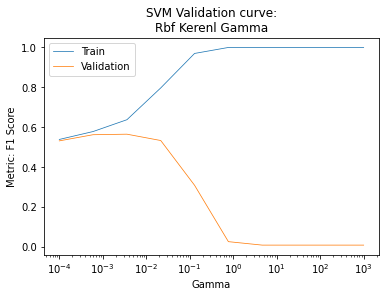

In [40]:
axs = plt.gca()
axs.plot(df_4['x'], df_4['train'], label='Train', linewidth=0.75)
axs.plot(df_4['x'], df_4['test'], label='Validation', linewidth=0.75)
axs.legend(); axs.set_ylabel("Metric: F1 Score"); axs.set_xlabel("Gamma")
axs.set_xscale('log')
axs.set_title('SVM Validation curve:\nRbf Kerenl Gamma')

In [48]:
#Plot iterations
svc5 = SVC(kernel='rbf', class_weight='balanced', gamma=0.0036, random_state=0)
range_list5 = np.logspace(1,6,15).astype('int32')
range_list5

array([     10,      22,      51,     117,     268,     610,    1389,
          3162,    7196,   16378,   37275,   84834,  193069,  439397,
       1000000], dtype=int32)

In [49]:
svc_train_scores5, svc_test_scores5 = validation_curve(
    svc5, X, y, param_name="max_iter", param_range=range_list5,
    scoring=scorer, cv=strat_cv, n_jobs=-1)
print("done")

/Users/sdodge/work/omscs/cs7641/cs7641_assignments/env3.9.7/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/sdodge/work/omscs/cs7641/cs7641_assignments/env3.9.7/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=22).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/sdodge/work/omscs/cs7641/cs7641_assignments/env3.9.7/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=51).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/sdodge/work/omscs/cs7641/cs7641_assignments/env3.9.7/lib/python3.9/site-packages/sklear

done


In [50]:

train_scores_mean5 = np.mean(svc_train_scores5, axis=1)
test_scores_mean5 = np.mean(svc_test_scores5, axis=1)
print (range_list5.shape,train_scores_mean5.shape,test_scores_mean5.shape)
df_5 = pd.DataFrame({'x':range_list5,'train':train_scores_mean5,'test':test_scores_mean5} )
df_5

(15,) (15,) (15,)


,x,train,test
0,10,0.399209,0.399198
1,22,0.399209,0.399198
2,51,0.399209,0.399198
3,117,0.399198,0.399198
4,268,0.399198,0.399198
5,610,0.399198,0.399198
6,1389,0.399220,0.399242
7,3162,0.422695,0.417391
8,7196,0.636715,0.562696
9,16378,0.636404,0.563772


Text(0.5, 1.0, 'SVM Iterations Curve')

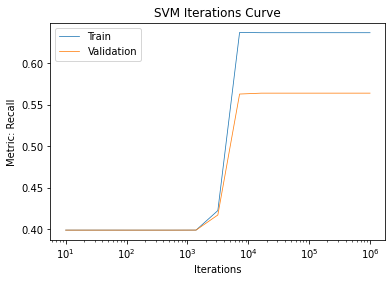

In [51]:
axs = plt.gca()
axs.plot(df_5['x'], df_5['train'], label='Train', linewidth=0.75)
axs.plot(df_5['x'], df_5['test'], label='Validation', linewidth=0.75)
axs.legend(); axs.set_ylabel("Metric: Recall"); axs.set_xlabel("Iterations")
axs.set_xscale("log")
axs.set_title('SVM Iterations Curve')